# HIV Testing Intervention

Tests and code for the creation of a new HIV testing intervention. 

In [1]:
import matplotlib.pyplot as plt

import stisim as ss

STIsim 0.0.8 (2023-10-04) — © 2023 by IDM


## Runing an basic simulation

In [3]:
# Network
ppl = ss.People( 10_000 )
ppl.networks = ss.ndict( ss.simple_sexual(), ss.maternal() )


# HIV settings and interventions
hiv_params = { 'beta'      : { 'simple_sexual': [ 0.0008, 0.0004], 
                               'maternal'     : [ 0.2   , 0     ]
                              },
               'initial' : 50   # Is this working with init_states?
              }
hiv = ss.HIV( pars=hiv_params )

hiv_simple_diagnostic = ss.hiv.SimpleDiagnosticTest()


# Simulation parameters
sim_params = { 'start': 1985,
               'end'  : 2050
              }


# Create and run simulation
sim = ss.Sim( pars          = sim_params,
              people        = ppl, 
              demographics  = [ ss.Pregnancy() ],   # Isn't people also demographics?
              diseases      = [ hiv, ss.Gonorrhea() ],
              interventions = [ hiv_simple_diagnostic ]
             )
sim.initialize()
sim.run()

... creating SimpleDiagnosticTest intervention
Initializing sim (warning: not resetting sim.people) with 10000 agents
... initializing SimpleDiagnosticTest
  Running 1985.0 ( 0/66) (0.00 s)  ———————————————————— 2%
  Running 1995.0 (10/66) (6.20 s)  •••————————————————— 17%
  Running 2005.0 (20/66) (6.42 s)  ••••••—————————————— 32%
  Running 2015.0 (30/66) (6.59 s)  •••••••••——————————— 47%
  Running 2025.0 (40/66) (6.83 s)  ••••••••••••———————— 62%
  Running 2035.0 (50/66) (7.09 s)  •••••••••••••••————— 77%
  Running 2045.0 (60/66) (7.38 s)  ••••••••••••••••••—— 92%


[<class 'stisim.sim.Sim'>, <class 'sciris.sc_utils.prettyobj'>, <class 'object'>]
————————————————————————————————————————————————————————————
Methods:
  finalize()          init_people()       shrink()            
  init_analyzers()    init_time_vecs()    step()              
  init_demographi...  initialize()        validate_dt()       
  init_diseases()     load()              validate_pars()     
  init_interventi...  run()               validate_post_i...  
  init_networks()     save()              
————————————————————————————————————————————————————————————
Properties:
  dt                  year                
————————————————————————————————————————————————————————————
    analyzers: objdict()
     complete: True
   connectors: None
      created: None
 demographics: #0. 'pregnancy':
                [...]
     diseases: #0. 'hiv':
               [<class 'stisim.hiv.H [...]
     filename: None
  initialized: True
interventions: #0. 'simplediagnostictest':
               <stisim

Text(0.5, 1.0, 'HIV: number of infections')

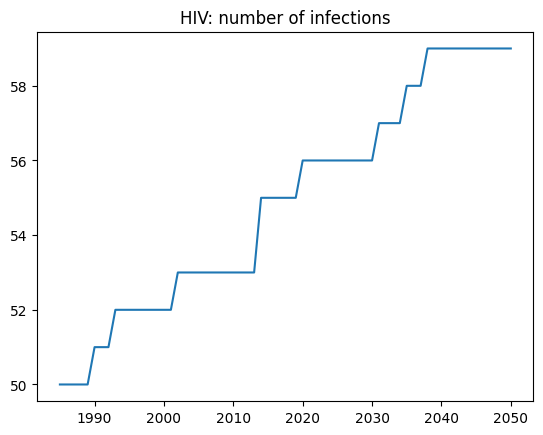

In [5]:
plt.figure()
plt.plot( sim.yearvec, sim.results.hiv.n_infected )
plt.title( 'HIV: number of infections' )

## Testing intervention

In [17]:
ppl.states

#0. 'age':
         Quantity
UID
0      121.200090
1      139.117086
2      123.061092
3       93.721473
4      113.695979
...           ...
26561    0.250000
26562    0.250000
26563    0.250000
26564    0.250000
26565    0.250000

[26566 rows x 1 columns]
————————————————————————————————————————
#1. 'female':
       Quantity
UID
0          True
1          True
2         False
3         False
4          True
...         ...
26561     False
26562     False
26563      True
26564      True
26565      True

[26566 rows x 1 columns]
————————————————————————————————————————
#2. 'debut':
       Quantity
UID
0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
...         ...
26561       0.0
26562       0.0
26563       0.0
26564       0.0
26565       0.0

[26566 rows x 1 columns]
————————————————————————————————————————
#3. 'alive':
       Quantity
UID
0          True
1          True
2          True
3          True
4          True
...         ...
26561      True
2656

In [7]:
ppl['states']

#0. 'age':
         Quantity
UID
0      121.200090
1      139.117086
2      123.061092
3       93.721473
4      113.695979
...           ...
26561    0.250000
26562    0.250000
26563    0.250000
26564    0.250000
26565    0.250000

[26566 rows x 1 columns]
————————————————————————————————————————
#1. 'female':
       Quantity
UID
0          True
1          True
2         False
3         False
4          True
...         ...
26561     False
26562     False
26563      True
26564      True
26565      True

[26566 rows x 1 columns]
————————————————————————————————————————
#2. 'debut':
       Quantity
UID
0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
...         ...
26561       0.0
26562       0.0
26563       0.0
26564       0.0
26565       0.0

[26566 rows x 1 columns]
————————————————————————————————————————
#3. 'alive':
       Quantity
UID
0          True
1          True
2          True
3          True
4          True
...         ...
26561      True
2656